In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
X, y = load_iris(return_X_y=True)

X.shape, y.shape

((150, 4), (150,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# each radom_state use constant split train/test, None value change train/test in every run

knn = KNeighborsClassifier().fit(X_train, y_train)

yPred = knn.predict(X_test)

metrics.accuracy_score(y_test, yPred)

1.0

In [4]:
from sklearn.model_selection import KFold

In [5]:
X2 = ['a', 'b', 'c', 'd']
kf = KFold(n_splits=4, shuffle=False)

for train, test in kf.split(X2):
    print(train, test)
    
print('-------------')
X2 = ['a', 'b', 'c', 'd', 'e', 'f']
kf = KFold(n_splits=2, shuffle=False)

for train, test in kf.split(X2):
    print(train, test)

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]
-------------
[3 4 5] [0 1 2]
[0 1 2] [3 4 5]


In [6]:
from sklearn.model_selection import cross_val_score

In [31]:
knn = KNeighborsClassifier()
score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
score

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [32]:
score.mean()

0.9666666666666668

In [33]:
K = range(1,31)
k_score = []

for i in K:
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, scoring='accuracy')
    k_score.append(score.mean())

In [36]:
import pandas as pd

df = pd.DataFrame(k_score, index=K, columns=['score'])

# df.rename(columns={0:'score'}, inplace=True)
filt = df['score'] == df['score'].max()
df.loc[filt]

,score
6,0.98
7,0.98
10,0.98
11,0.98
12,0.98


Text(0, 0.5, 'accuracy')

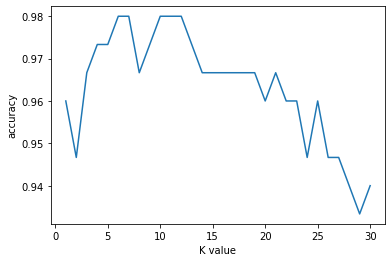

In [37]:
import matplotlib.pyplot as plt

plt.plot(K, k_score)
plt.xlabel('K value')
plt.ylabel('accuracy')

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
knn = KNeighborsClassifier(n_neighbors=12)
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.9733333333333334

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=150)
cross_val_score(lr, X, y, cv=10, scoring='accuracy').mean()

0.9733333333333334

In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [42]:
df2 = pd.read_csv('advertising.csv')

X = df2[['TV', 'Radio', 'Newspaper']]
y = df2.Sales

In [43]:
lm = LinearRegression()
cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error').mean()

-2.841834002387103

In [92]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [100]:
lm = LinearRegression()
mse = -cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
mse

array([2.59662215, 3.56287715, 2.45393638, 1.64155933, 1.73171993,
       1.94005563, 5.06956618, 4.22784313, 2.74564465, 2.44851551])

In [99]:
rmse = np.sqrt(mse)
rmse

array([1.61140378, 1.88755852, 1.56650451, 1.28123352, 1.3159483 ,
       1.3928588 , 2.25156971, 2.05617196, 1.65699869, 1.56477331])

In [101]:
rmse.mean()

1.658502109162588

In [102]:
df2 = pd.read_csv('advertising.csv')

X = df2[['TV', 'Radio']]
y = df2.Sales

lm = LinearRegression()
np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean()

1.6541845608292287